# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Dataset

In [2]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
features = data.drop(["label"], axis=1)
labels = data ['label']

# Training Model

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2,random_state=42)

In [6]:
features

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
labels

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [8]:
print(features.describe())
labels.describe()

        pixel0   pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7  \
count  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel8   pixel9  ...      pixel774      pixel775      pixel776  \
count  42000.0  42000.0  ...  42000.000000  42000.000000  42000.000000   
mean       0.0      0.0  ...      0.219286      0.117095      0.059024   
std        0.0      0.0  ...      6.312890      

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [9]:
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
x_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y_train

34941    6
24433    5
24432    3
8832     4
30291    7
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 33600, dtype: int64

In [12]:
y_test

5457     8
38509    1
25536    9
31803    9
39863    8
        ..
8388     4
29359    9
40276    3
18421    0
4335     9
Name: label, Length: 8400, dtype: int64

In [13]:
len(x_train)


33600

In [14]:
x_train.loc[0].values


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [15]:
x_train.loc[20].values


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  34,  34,   0,   0,   0,  57,
       136, 162, 245, 203,  19,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [16]:
y_train[0]


1

In [17]:
y_train[20]


8

In [18]:
labels.loc[20]


8

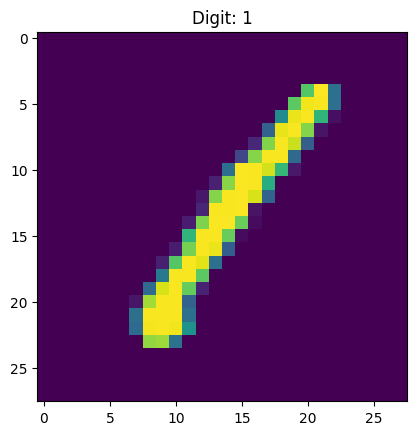

In [19]:
img = x_train.loc[0].values.reshape(28,28)
plt.title('Digit: '+ str(y_train[0]))
plt.imshow(img)

In [20]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))


33600
33600
8400
8400


In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [22]:
features.shape


(42000, 784)

In [23]:
x_train = x_train /255
x_test = x_test /255

In [24]:
x_train.loc[0].values


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(784,), activation= 'relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [26]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [27]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='model_weights.h5', save_weights_only=True),
    keras.callbacks.History()
]
history = model.fit(x_train, y_train, epochs=20, callbacks=callbacks)

epoch_accuracy = history.history['accuracy']
np.save('epoch_accuracy.npy', epoch_accuracy)

Epoch 1/20
1050/1050 [==============================] - 16s 12ms/step - loss: 0.3293 - accuracy: 0.8988
Epoch 2/20
1050/1050 [==============================] - 9s 9ms/step - loss: 0.1224 - accuracy: 0.9635
Epoch 3/20
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0879 - accuracy: 0.9733
Epoch 4/20
1050/1050 [==============================] - 12s 12ms/step - loss: 0.0676 - accuracy: 0.9786
Epoch 5/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0559 - accuracy: 0.9819
Epoch 6/20
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0464 - accuracy: 0.9859
Epoch 7/20
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0415 - accuracy: 0.9880
Epoch 8/20
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0356 - accuracy: 0.9891
Epoch 9/20
1050/1050 [==============================] - 8s 7ms/step - loss: 0.0307 - accuracy: 0.9905
Epoch 10/20
1050/1050 [==============================] - 10s 10ms/step - loss

# Calculate Accuracy

In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)

263/263 [==============================] - 1s 3ms/step - loss: 0.1233 - accuracy: 0.9745
Test loss:  0.12329159677028656
Test accuracy:  0.9745237827301025


# Calculate Precision

In [29]:
test_predictions = model.predict(x_test)
test_predictions[0]

263/263 [==============================] - 1s 4ms/step


array([9.1809781e-08, 4.2898009e-07, 1.3804899e-08, 2.4055871e-07,
       4.6886637e-09, 1.7302866e-09, 1.1943949e-09, 4.4452501e-11,
       9.9999756e-01, 1.5832936e-06], dtype=float32)

In [30]:
np.argmax(test_predictions[0])


8

In [31]:
y_test[:5]


5457     8
38509    1
25536    9
31803    9
39863    8
Name: label, dtype: int64

In [32]:
predicted_labels = [np.argmax(i) for i in test_predictions]
predicted_labels[:5]

[8, 1, 9, 9, 8]

In [33]:
test_predictions = model.predict(x_test)
predicted_labels = np.argmax(test_predictions, axis=1)

263/263 [==============================] - 1s 3ms/step


In [34]:
correct_predictions = np.sum(predicted_labels == y_test)
total_samples = len(y_test)

In [35]:
accuracy = accuracy_score(y_test, predicted_labels)
print('Test Accuracy: ', accuracy)


Test Accuracy:  0.9745238095238096


In [37]:
precision = precision_score(y_test, predicted_labels, average= 'weighted')
print('Precision: ',precision)

Precision:  0.9745833007028958


In [38]:
f1 = f1_score(y_test, predicted_labels, average= 'weighted')
print('F1_Score: ',f1)

F1_Score:  0.9745052537650162


In [39]:
conf_matrix = confusion_matrix(y_test, predicted_labels)
print('Confusion Matrix: ', conf_matrix)


Confusion Matrix:  [[802   0   1   2   0   1   5   1   4   0]
 [  0 902   1   1   0   1   1   1   2   0]
 [  2   5 821   4   6   0   0   7   1   0]
 [  0   2   3 914   0   8   0   4   3   3]
 [  2   2   1   0 814   1   9   0   0  10]
 [  0   0   0  11   0 678   8   1   2   2]
 [  0   1   0   0   0   3 781   0   0   0]
 [  0   1   2   0   3   2   0 873   3   9]
 [  0   6   3   5   4  11   4   2 798   2]
 [  2   2   2   5   9   3   0   8   4 803]]


In [40]:
model.load_weights('model_weights.h5')


In [41]:
np.load('epoch_accuracy.npy')


array([0.89880955, 0.96348214, 0.97333336, 0.97857141, 0.981875  ,
       0.98592263, 0.98800594, 0.98913693, 0.99047619, 0.99223214,
       0.99241072, 0.99348217, 0.99291664, 0.99437499, 0.99416667,
       0.99508929, 0.99434525, 0.99511904, 0.9972024 , 0.99559522])